## Imports, Variables and Connect to Reddit API

In [2]:
#imports and variables
import datetime
import praw
import csv
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from credentials import p_id, p_agent, p_secret, p_pass

total_post_limit = 5000
last_n_days = 19
today = datetime.date.today().day

sub_name = 'Stocks'
csv_file = 'reddit_posts.csv'
data_folder = 'data/'

In [3]:
#connect to reddit API
#check authentication
#select subreddit

reddit = praw.Reddit(
    client_id=p_id,
    client_secret=p_secret,
    password=p_pass,
    user_agent='scrapper_bot',
    username=p_agent,
)

print(reddit.read_only)
print(reddit.user.me())


# Subreddit to search
subreddit = reddit.subreddit(sub_name) 

#define date helper funciton
#function to return date of post
def get_date(submission):
    time = submission.created
    return datetime.datetime.fromtimestamp(time)

False
Adopolis23


## Get data from Yfinance

In [12]:

tickers = ["TSLA"]
stock_price = yf.download(tickers,  start = "2024-06-02" , end = "2024-06-20")
stock_price = stock_price['Close']

stock_price

list(stock_price.index.day)


[*********************100%%**********************]  1 of 1 completed


[3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18]

## Get data from Reddit

In [36]:
days_mentions = {}
terms_of_interest = ['TSLA', 'Tesla', 'TESLA']
dates_to_save = np.arange(today, today-last_n_days, -1)

In [37]:
#for each post in the subreddit
for submission in subreddit.new(limit=total_post_limit):

    #make sure it is on one of the days we are checking
    if get_date(submission).day not in list(stock_price.index.day):
        continue
    if get_date(submission).day < 2:
        break
    if get_date(submission).day not in days_mentions:
        days_mentions[get_date(submission).day] = 0



    #get the total text of the post
    total_text = submission.title + ' ' + submission.selftext
    
    mention_count = 0

    #for each word check if TOI and then count
    for word in total_text.split():
        word = word.replace('.', '')
        word = word.replace(',', '')
        word = word.replace('?', '')
        
        if word in terms_of_interest:
            mention_count = mention_count+1

    #if(mention_count != 0):
        #print(submission.title)

    #add count to total count for that day
    days_mentions[get_date(submission).day] = days_mentions[get_date(submission).day] + mention_count 
    

print(days_mentions)


{18: 12, 17: 10, 14: 11, 13: 33, 12: 22, 11: 5, 10: 19, 7: 0, 6: 12, 5: 0, 4: 28, 3: 1}


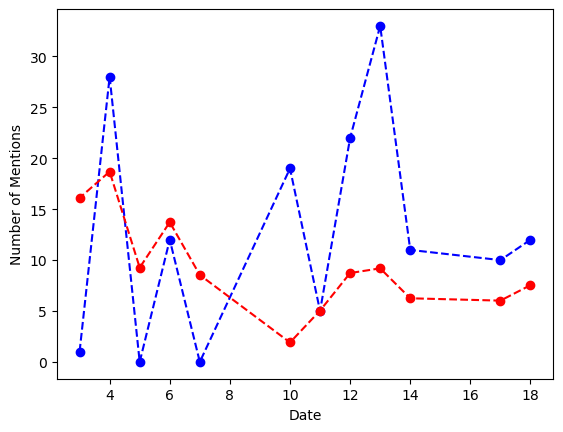

In [48]:
days_x = list(stock_price.index.day)
days_x.reverse()

corrected_stock_p = stock_price - (170+187.5)/2 + 10

plt.plot(days_x, days_mentions.values(), '--bo')
plt.plot(days_x, corrected_stock_p, '--ro')
plt.ylabel('Number of Mentions')
plt.xlabel('Date')
plt.show()

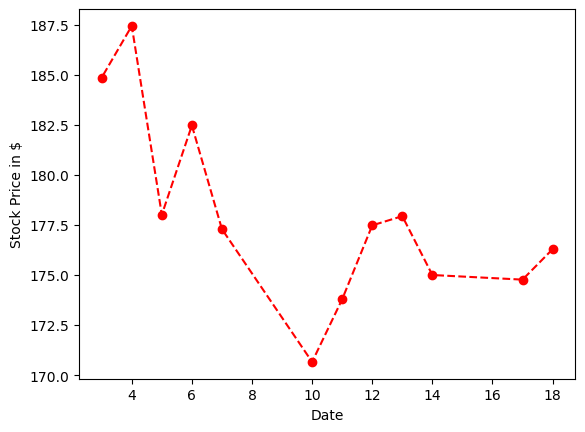

In [42]:
plt.plot(days_x, stock_price, '--ro')
plt.ylabel('Stock Price in $')
plt.xlabel('Date')
plt.show()

In [44]:
(170+187.5)/2 - 16

162.75